# Indíce

#### 1) Preparação dos dados
#### 2) Feature Engineering
#### 3) Classificação
#### 4) Modelo Final
#### 5) Conclusões
#### 6) Classificação dos dados finais

## 1) Preparação dos dados

In [1]:
import pandas as pd

import numpy as np

import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Safra_2018-2019.csv', index_col=0)

df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1


#### Podemos verificar que as classes não são balanceadas. Vamos ter que ver o impacto disso no modelo.

In [3]:
df['dano_na_plantacao'].value_counts()

0    66716
1    11183
2     2101
Name: dano_na_plantacao, dtype: int64

In [4]:
df.isnull().sum()

Identificador_Agricultor       0
Estimativa_de_Insetos          0
Tipo_de_Cultivo                0
Tipo_de_Solo                   0
Categoria_Pesticida            0
Doses_Semana                   0
Semanas_Utilizando          8055
Semanas_Sem_Uso                0
Temporada                      0
dano_na_plantacao              0
dtype: int64

#### Há presença de valores nulos.

In [5]:
print('Média de Semanas_Utilizando = ',df['Semanas_Utilizando'].mean())
print('Desvio padrão de Semanas_Utilizando = ',df['Semanas_Utilizando'].std())

Média de Semanas_Utilizando =  28.66447981096671
Desvio padrão de Semanas_Utilizando =  12.424750638090432


#### O desvio padrão da coluna com valores nulos é muito elevado em comparação a média. Escolhe-se deletar essas amostras.

In [6]:
df = df.dropna()

df.reset_index(drop=True, inplace=True)

df['dano_na_plantacao'].value_counts()

0    59999
1    10075
2     1871
Name: dano_na_plantacao, dtype: int64

#### Visto a presença de features categóricas, devemos passar as mesmas para texto para aplicar one-hot-enconding

In [7]:
for i in range(len(df)):
    if df['Categoria_Pesticida'][i] == 1:
        df['Categoria_Pesticida'][i] = 'nunca_usou'
    elif df['Categoria_Pesticida'][i] == 2:
        df['Categoria_Pesticida'][i] = 'ja_usou'
    elif df['Categoria_Pesticida'][i] == 3:
        df['Categoria_Pesticida'][i] = 'esta_usando'
        
    if df['Temporada'][i] == 1:
        df['Temporada'][i] = 'temp_1'
    elif df['Temporada'][i] == 2:
        df['Temporada'][i] = 'temp_2'
    elif df['Temporada'][i] == 3:
        df['Temporada'][i] = 'temp_3'    
    
        
df.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,nunca_usou,0,0.0,0,temp_1,0
1,SCROP00002,209,1,0,nunca_usou,0,0.0,0,temp_2,1
2,SCROP00003,257,1,0,nunca_usou,0,0.0,0,temp_2,1
3,SCROP00004,257,1,1,nunca_usou,0,0.0,0,temp_2,1
4,SCROP00005,342,1,0,nunca_usou,0,0.0,0,temp_2,1


## 2) Feature Engineering

#### Vamos aplicar o polinomio de segundo e terceiro grau para as features númericos, aumentando a dimensão dos dados.

In [8]:
df['Est_insento_poly2'] = df['Estimativa_de_Insetos']**2
df['Est_insento_poly3'] = df['Estimativa_de_Insetos']**3

df['Doses_semana_poly2'] = df['Doses_Semana']**2
df['Doses_semana_poly3'] = df['Doses_Semana']**3

df['Semanas_Utilizando_poly2'] = df['Semanas_Utilizando']**2
df['Semanas_Utilizando_poly3'] = df['Semanas_Utilizando']**3

df['Semanas_Sem_Uso_poly2'] = df['Semanas_Sem_Uso']**2
df['Semanas_Sem_Uso_poly3'] = df['Semanas_Sem_Uso']**3

#### Separa-se a coluna 'targets' e as colunas preditoras. 

In [9]:
Y_total = df[['dano_na_plantacao']]
X_total = df.drop(['Identificador_Agricultor', 'dano_na_plantacao'], axis=1)

X_total.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,Est_insento_poly2,Est_insento_poly3,Doses_semana_poly2,Doses_semana_poly3,Semanas_Utilizando_poly2,Semanas_Utilizando_poly3,Semanas_Sem_Uso_poly2,Semanas_Sem_Uso_poly3
0,188,1,0,nunca_usou,0,0.0,0,temp_1,35344,6644672,0,0,0.0,0.0,0,0
1,209,1,0,nunca_usou,0,0.0,0,temp_2,43681,9129329,0,0,0.0,0.0,0,0
2,257,1,0,nunca_usou,0,0.0,0,temp_2,66049,16974593,0,0,0.0,0.0,0,0
3,257,1,1,nunca_usou,0,0.0,0,temp_2,66049,16974593,0,0,0.0,0.0,0,0
4,342,1,0,nunca_usou,0,0.0,0,temp_2,116964,40001688,0,0,0.0,0.0,0,0


#### Aplicando one-hot-enconding nas features categóricas...

In [10]:
X_total = pd.get_dummies(X_total, columns = ['Categoria_Pesticida', 'Temporada'])

X_total.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Est_insento_poly2,Est_insento_poly3,Doses_semana_poly2,Doses_semana_poly3,Semanas_Utilizando_poly2,Semanas_Utilizando_poly3,Semanas_Sem_Uso_poly2,Semanas_Sem_Uso_poly3,Categoria_Pesticida_esta_usando,Categoria_Pesticida_ja_usou,Categoria_Pesticida_nunca_usou,Temporada_temp_1,Temporada_temp_2,Temporada_temp_3
0,188,1,0,0,0.0,0,35344,6644672,0,0,0.0,0.0,0,0,0,0,1,1,0,0
1,209,1,0,0,0.0,0,43681,9129329,0,0,0.0,0.0,0,0,0,0,1,0,1,0
2,257,1,0,0,0.0,0,66049,16974593,0,0,0.0,0.0,0,0,0,0,1,0,1,0
3,257,1,1,0,0.0,0,66049,16974593,0,0,0.0,0.0,0,0,0,0,1,0,1,0
4,342,1,0,0,0.0,0,116964,40001688,0,0,0.0,0.0,0,0,0,0,1,0,1,0


## 3) Classificação

#### Escolheu-se utilizar um modelo classificador baseado em Árvores de Decisão, visto a sua maior velocidade de ajuste aos dados.

#### Além disso, junto a métrica de acurácia, foi utilizado Precision, Recall, F1 e a "confusion matrix", pois, visto o problema de classes não balanceadas, essas métricas auxiliam a verificação de como o modelo "enxerga" cada classe.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt

### 3.1) Todas as Amostras

#### Nesta etapa, é verificado a performance do modelo com todos as amostras disponíveis. 
#### Foi utilizado 10% das mesmas para teste.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (64750, 20) (64750, 1)
Test set: (7195, 20) (7195, 1)


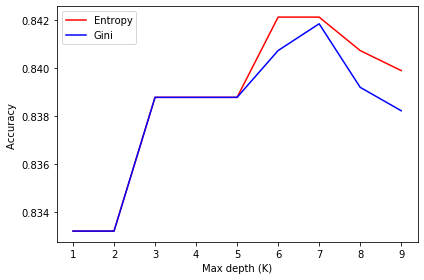

The best entropy accuracy was 84.211 % with max_depth = 6
The best gini accuracy was 84.183 % with max_depth = 7


In [13]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

#### Implementando o modelo com melhor acurácia...

In [14]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6, random_state = 2).fit(X_train,y_train)

In [15]:
pred = DecTree.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.7985044208846964
recall score = 0.8421125781792912
f1 score = 0.7952605947833904
[[5910   85    0]
 [ 886  148    2]
 [ 129   34    1]]


#### É possível verificar na "confusion matrix" que, mesmo apresentando precision e recall aceitáveis, o modelo não consegue distinguir bem os padrões referentes as classes 1 e 2, consequentemente, 'enxergando' apenas a classe 0.

### 3.2) Undersample para a classe 2

#### Visto que a classe 2 é a que possui menos amostras, foi coletado essa quantidade de amostras das classes 0 e 1, com o objetivo de obter um equilibrio entre as classes.

In [16]:
quantidade_2 = len(df[df['dano_na_plantacao'] == 2]) #calcular a quantidade para undersample

indices_1 = df[df['dano_na_plantacao'] == 1].index # indices da classe majoritária
indices_0 = df[df['dano_na_plantacao'] == 0].index

random_indices_1 = np.random.choice(indices_1,quantidade_2, replace=False) # coleta aleatória da classe majoritária
random_indices_0 = np.random.choice(indices_0,quantidade_2, replace=False)

indices_2 = df[df['dano_na_plantacao'] == 2].index # indices das classes minoritárias

under_sample_indices = np.concatenate([random_indices_0, random_indices_1,indices_2])
under_sample = df.loc[under_sample_indices]
under_sample.reset_index(drop=True, inplace=True)

Y_under_sample = under_sample[['dano_na_plantacao']]
X_under_sample = under_sample.drop(['Identificador_Agricultor', 'dano_na_plantacao'], axis=1)
X_under_sample = pd.get_dummies(X_under_sample, columns = ['Categoria_Pesticida', 'Temporada'])

under_sample['dano_na_plantacao'].value_counts()

2    1871
1    1871
0    1871
Name: dano_na_plantacao, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sample, Y_under_sample
                                                    , test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5051, 20) (5051, 1)
Test set: (562, 20) (562, 1)


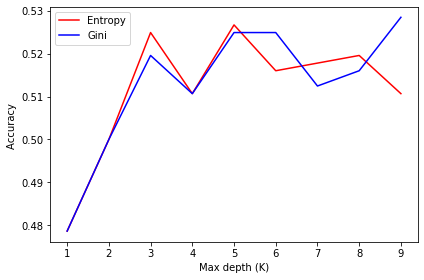

The best entropy accuracy was 52.669 % with max_depth = 5
The best gini accuracy was 52.847 % with max_depth = 9


In [18]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

In [19]:
DecTree = DecisionTreeClassifier(criterion="gini", max_depth = 9, random_state = 2).fit(X_train,y_train)

In [20]:
pred = DecTree.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.5187116245284806
recall score = 0.5284697508896797
f1 score = 0.5181791001046128
[[122  30  25]
 [ 46  61  80]
 [ 41  43 114]]


#### Verificando a "confusion matrix obtida", verfica-se que o desempenho para classificar amostras da classe 2 melhorou. No entanto, houve uma piora significativa para a classificação de 1.

#### Levanta-se a hipótese que é díficil obter uma distinção aceitável entre as classes 1 e 2.

### 3.3) Undersample para classe 1, excluindo classe 2

#### Realiza-se a mesma estratégia de undersample aplicada anteriormente. No entanto, não é utilizado amostras da classe 2.
#### Dessa forma, o problema passa a ser uma classificação binária (0 ou 1)

In [21]:
quantidade_1 = len(df[df['dano_na_plantacao'] == 1]) #calcular a quantidade para undersample


indices_0 = df[df['dano_na_plantacao'] == 0].index # indices da classe majoritária


random_indices_0 = np.random.choice(indices_0,quantidade_1, replace=False) # coleta aleatória da classe majoritária

indices_1 = df[df['dano_na_plantacao'] == 1].index # indices das classes minoritárias

under_sample_indices = np.concatenate([random_indices_0, indices_1,])
under_sample = df.loc[under_sample_indices]
under_sample.reset_index(drop=True, inplace=True)

Y_under_sample = under_sample[['dano_na_plantacao']]
X_under_sample = under_sample.drop(['Identificador_Agricultor', 'dano_na_plantacao'], axis=1)
X_under_sample = pd.get_dummies(X_under_sample, columns = ['Categoria_Pesticida', 'Temporada'])

under_sample['dano_na_plantacao'].value_counts()

1    10075
0    10075
Name: dano_na_plantacao, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sample, Y_under_sample
                                                    , test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (18135, 20) (18135, 1)
Test set: (2015, 20) (2015, 1)


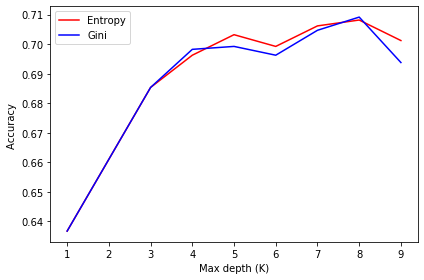

The best entropy accuracy was 70.819 % with max_depth = 8
The best gini accuracy was 70.918 % with max_depth = 8


In [23]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

In [24]:
DecTree = DecisionTreeClassifier(criterion="gini", max_depth = 8, random_state = 2).fit(X_train,y_train)

In [25]:
pred = DecTree.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.7119396077870502
recall score = 0.709181141439206
f1 score = 0.7084309792472726
[[667 348]
 [238 762]]


#### Por meio da "confusion matrix", observa-se que, dessa forma, foi obtida uma melhor distinção entre as classes 0 e 1, podendo-se abstrair melhores padrões referentes a cada uma.

### 3.4) Undersample para classe 2, excluindo a classe 1

#### Realiza-se o mesmo procedimento em 3.3, porém excluindo a classe 1, e aplicando undersample para a classe 2.

In [26]:
quantidade_2 = len(df[df['dano_na_plantacao'] == 2]) #calcular a quantidade para undersample


indices_0 = df[df['dano_na_plantacao'] == 0].index # indices da classe majoritária


random_indices_0 = np.random.choice(indices_0,quantidade_2, replace=False) # coleta aleatória da classe majoritária

indices_2 = df[df['dano_na_plantacao'] == 2].index # indices das classes minoritárias

under_sample_indices = np.concatenate([random_indices_0, indices_2,])
under_sample = df.loc[under_sample_indices]
under_sample.reset_index(drop=True, inplace=True)

Y_under_sample = under_sample[['dano_na_plantacao']]
X_under_sample = under_sample.drop(['Identificador_Agricultor', 'dano_na_plantacao'], axis=1)
X_under_sample = pd.get_dummies(X_under_sample, columns = ['Categoria_Pesticida', 'Temporada'])

under_sample['dano_na_plantacao'].value_counts()

2    1871
0    1871
Name: dano_na_plantacao, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sample, Y_under_sample
                                                    , test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3367, 20) (3367, 1)
Test set: (375, 20) (375, 1)


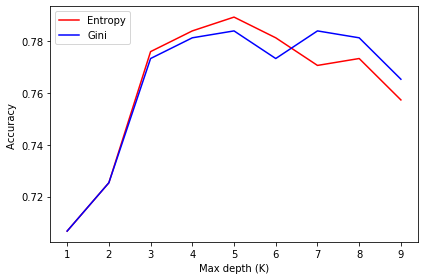

The best entropy accuracy was 78.933 % with max_depth = 5
The best gini accuracy was 78.4 % with max_depth = 5


In [28]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

In [29]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state = 2).fit(X_train,y_train)

In [30]:
pred = DecTree.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.7938204906204906
recall score = 0.7893333333333333
f1 score = 0.7885726898861385
[[159  28]
 [ 51 137]]


#### Novamente observa-se o bom desempenho de distinção entre classes.

### 3.5) Classificação entre 1 e 2

#### É realizada uma classificação entre as classes 1 e 2, com o objetivo de responder a hipótese levantada em 3.2.

#### Aplica-se undersample para a quantidade de amostras da classe 2.

In [31]:
X_total_12 = X_total.copy()
Y_total_12 = Y_total.copy()

X_total_12 = X_total_12[Y_total_12['dano_na_plantacao'] != 0]
Y_total_12 = Y_total_12[Y_total_12['dano_na_plantacao'] != 0]

quantidade_2 = len(Y_total_12[Y_total_12['dano_na_plantacao'] == 2]) #calcular a quantidade para undersample


indices_1 = Y_total_12[Y_total_12['dano_na_plantacao'] == 1].index # indices da classe majoritária


random_indices_1 = np.random.choice(indices_1,quantidade_2, replace=False) # coleta aleatória da classe majoritária

indices_2 = Y_total_12[Y_total_12['dano_na_plantacao'] == 2].index # indices das classes minoritárias

under_sample_indices = np.concatenate([random_indices_1, indices_2])
under_sample_targets = Y_total_12.loc[under_sample_indices]
under_sample_targets.reset_index(drop=True, inplace=True)
under_sample_samples = X_total.loc[under_sample_indices]
under_sample_samples.reset_index(drop=True, inplace=True)

under_sample_targets['dano_na_plantacao'].value_counts()

1    1871
2    1871
Name: dano_na_plantacao, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(under_sample_samples, under_sample_targets
                                                    , test_size=0.1, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3367, 20) (3367, 1)
Test set: (375, 20) (375, 1)


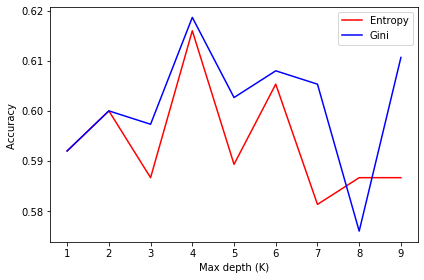

The best entropy accuracy was 61.6 % with max_depth = 4
The best gini accuracy was 61.867 % with max_depth = 4


In [33]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

In [34]:
DecTree_12 = DecisionTreeClassifier(criterion="gini", max_depth = 4, random_state = 2).fit(X_train,y_train)

In [35]:
pred = DecTree_12.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.6174520373268417
recall score = 0.6186666666666667
f1 score = 0.6173131869053008
[[ 97  78]
 [ 65 135]]


#### É confirmado que a distinção entre as classes 1 e 2 é bem complicada para o modelo baseado em Árvore de Decisão.

### 3.6) Juntando classes 1 e 2, classificação entre 0 e 1*
#### undersample para classe 1*

#### Observando os resultados obtidos anteriormente, busca-se, agora, classificar as amostras entre 0 e [1-2]. 
#### Questiona-se se o modelo utilizado neste estudo apresenta melhor distinção entre as amostras de safra que não tiveram dano algum e que tiveram algum dano (independente de sua causa).

In [36]:
Y_total_bin = Y_total.copy()

for i in range(len(Y_total_bin)):
  if Y_total_bin['dano_na_plantacao'][i] == 2:
    Y_total_bin['dano_na_plantacao'][i] = 1

Y_total_bin['dano_na_plantacao'].value_counts() 

0    59999
1    11946
Name: dano_na_plantacao, dtype: int64

In [37]:
quantidade_1 = len(Y_total_bin[Y_total_bin['dano_na_plantacao'] == 1]) #calcular a quantidade para undersample


indices_0 = Y_total_bin[Y_total_bin['dano_na_plantacao'] == 0].index # indices da classe majoritária


random_indices_0 = np.random.choice(indices_0,quantidade_1, replace=False) # coleta aleatória da classe majoritária

indices_1 = Y_total_bin[Y_total_bin['dano_na_plantacao'] == 1].index # indices das classes minoritárias

under_sample_indices = np.concatenate([random_indices_0, indices_1])
under_sample_targets = Y_total_bin.loc[under_sample_indices]
under_sample_targets.reset_index(drop=True, inplace=True)
under_sample_samples = X_total.loc[under_sample_indices]
under_sample_samples.reset_index(drop=True, inplace=True)

under_sample_targets['dano_na_plantacao'].value_counts()

1    11946
0    11946
Name: dano_na_plantacao, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(under_sample_samples, under_sample_targets,
                                                    test_size=0.10, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21502, 20) (21502, 1)
Test set: (2390, 20) (2390, 1)


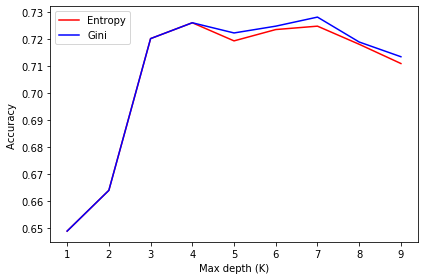

The best entropy accuracy was 72.594 % with max_depth = 4
The best gini accuracy was 72.803 % with max_depth = 7


In [39]:
accuracy_entropy = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_entropy.append(DecTree.score(X_test,y_test))
    
accuracy_gini = []
for k in range(1,10):
    DecTree = DecisionTreeClassifier(criterion="gini", max_depth = k, random_state = 2).fit(X_train,y_train)
    accuracy_gini.append(DecTree.score(X_test,y_test))

plt.plot(range(1,10),accuracy_entropy, 'r')
plt.plot(range(1,10),accuracy_gini, 'b')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.legend(('Entropy','Gini'))
plt.show()

print( "The best entropy accuracy was", round(np.array(accuracy_entropy).max()*100,3), "% with max_depth =",  np.array(accuracy_entropy).argmax()+1) 
print( "The best gini accuracy was", round(np.array(accuracy_gini).max()*100,3), "% with max_depth =",  np.array(accuracy_gini).argmax()+1) 

In [40]:
DecTree_bin = DecisionTreeClassifier(criterion="gini", max_depth = 7, random_state = 2).fit(X_train,y_train)

In [41]:
pred = DecTree_bin.predict(X_test)
print('precision score =',precision_score(y_test, pred, average='weighted'))
print('recall score =',recall_score(y_test, pred, average='weighted'))
print('f1 score =',f1_score(y_test, pred, average='weighted'))
print(confusion_matrix(y_test, pred))

precision score = 0.728039538485368
recall score = 0.7280334728033473
f1 score = 0.7279747821614889
[[898 314]
 [336 842]]


#### É possível observar que o modelo obtido apresenta bons resultados de precision e recall, além de apresentar uma melhor distinção entre classes.

## 4) Modelo Final, combinando DecTree_bin e DecTree_12

#### Utilizando os modelos obtidos na seção 3), obtêm-se os resultados finais da seguinte maneira:
    1) a partir do modelo que verifica se irá haver algum tipo de dano a safra (independente do motivo, DecTree_bin), é feito a predição de todas as amostras;
    2) caso haja algum tipo de dano a safra, utiliza-se o modelo DecTree_12 para identificar qual o tipo de dano.

In [42]:
pred = DecTree_bin.predict(X_total)

for i in range(len(pred)):
  if pred[i] == 1:
    pred[i] = DecTree_12.predict(X_total.iloc[[i]])

In [43]:
print('precision score =',precision_score(Y_total, pred, average='weighted'))
print('recall score =',recall_score(Y_total, pred, average='weighted'))
print('f1 score =',f1_score(Y_total, pred, average='weighted'))
print(confusion_matrix(Y_total, pred))

precision score = 0.8139604600582491
recall score = 0.6691639446799639
f1 score = 0.7256025553831114
[[43706  9538  6755]
 [ 2908  3285  3882]
 [  318   401  1152]]


#### Verifica-se que, em comparação ao resultado obtido em 3.1, sem abordar o problema de classes não balanceadas, o modelo atual apresentou uma melhor distinção entre classes, principalmente no referente a classe 2 (danos causados por pesticidas).

## 5) Conclusões

#### O dataset de estudo apresenta um grave problema de classes não balanceadas, exigindo uma validação dos resultados mais minuciosa afim de verificar a generalização do modelo obtido.

#### Utilizando o modelo DecisionTree, foi implementado uma estratégia que busca melhor o desempenho do modelo visando uma melhor distinção entre classes. Em comparação com o método original, o modelo apresentou melhor distinção entre as classes 0 e [1-2], porém ainda é insatisfatório na distinção entre as classes 1 e 2.

#### Como trabalho futuro, propõe-se:
    1) Utilizar modelos de machine learning mais robustos, tais como RandomForest, Naive Bayes, ou até mesmo Redes Neurais;
    2) Realizar um processo de feature engineering mais amplo, de acordo com as necessidades e regras de negócio;
    3) Estudar possíveis inferências estatísticas afim de abstrair melhores características referentes a cada classe de estudo. Sugere-se estudos de correlação (e.g pearson) e testes de hipótese, tal com a Análise de Variância.

## 6) Classificação dos dados finais

#### É realizado o mesmo processo de preparo de dados feito em 1) e 2).

In [54]:
df = pd.read_csv('Safra_2020.csv', index_col=0)

df.reset_index(drop=True, inplace=True)

print(len(df))

df.head()

8858


,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,SCROP80001,256,0,1,2,35,11.0,9,1
1,SCROP80002,283,0,1,2,5,5.0,6,1
2,SCROP80003,283,0,1,2,15,15.0,5,2
3,SCROP80004,283,0,1,2,15,NaN,7,2
4,SCROP80005,283,0,1,2,15,19.0,2,1


In [55]:
df.isnull().sum()

Identificador_Agricultor      0
Estimativa_de_Insetos         0
Tipo_de_Cultivo               0
Tipo_de_Solo                  0
Categoria_Pesticida           0
Doses_Semana                  0
Semanas_Utilizando          945
Semanas_Sem_Uso               0
Temporada                     0
dtype: int64

In [56]:
df['Semanas_Utilizando'].fillna(df['Semanas_Utilizando'].mean(), inplace=True)

In [57]:
for i in range(len(df)):
    if df['Categoria_Pesticida'][i] == 1:
        df['Categoria_Pesticida'][i] = 'nunca_usou'
    elif df['Categoria_Pesticida'][i] == 2:
        df['Categoria_Pesticida'][i] = 'ja_usou'
    elif df['Categoria_Pesticida'][i] == 3:
        df['Categoria_Pesticida'][i] = 'esta_usando'
        
    if df['Temporada'][i] == 1:
        df['Temporada'][i] = 'temp_1'
    elif df['Temporada'][i] == 2:
        df['Temporada'][i] = 'temp_2'
    elif df['Temporada'][i] == 3:
        df['Temporada'][i] = 'temp_3'
        
df['Est_insento_poly2'] = df['Estimativa_de_Insetos']**2
df['Est_insento_poly3'] = df['Estimativa_de_Insetos']**3

df['Doses_semana_poly2'] = df['Doses_Semana']**2
df['Doses_semana_poly3'] = df['Doses_Semana']**3

df['Semanas_Utilizando_poly2'] = df['Semanas_Utilizando']**2
df['Semanas_Utilizando_poly3'] = df['Semanas_Utilizando']**3

df['Semanas_Sem_Uso_poly2'] = df['Semanas_Sem_Uso']**2
df['Semanas_Sem_Uso_poly3'] = df['Semanas_Sem_Uso']**3

df.drop(['Identificador_Agricultor'], axis=1, inplace=True)

df = pd.get_dummies(df, columns = ['Categoria_Pesticida', 'Temporada'])

df.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Est_insento_poly2,Est_insento_poly3,Doses_semana_poly2,Doses_semana_poly3,Semanas_Utilizando_poly2,Semanas_Utilizando_poly3,Semanas_Sem_Uso_poly2,Semanas_Sem_Uso_poly3,Categoria_Pesticida_esta_usando,Categoria_Pesticida_ja_usou,Categoria_Pesticida_nunca_usou,Temporada_temp_1,Temporada_temp_2,Temporada_temp_3
0,256,0,1,35,11.000000,9,65536,16777216,1225,42875,121.000000,1331.000000,81,729,0,1,0,1,0,0
1,283,0,1,5,5.000000,6,80089,22665187,25,125,25.000000,125.000000,36,216,0,1,0,1,0,0
2,283,0,1,15,15.000000,5,80089,22665187,225,3375,225.000000,3375.000000,25,125,0,1,0,0,1,0
3,283,0,1,15,28.255655,7,80089,22665187,225,3375,798.382054,22558.808067,49,343,0,1,0,0,1,0
4,283,0,1,15,19.000000,2,80089,22665187,225,3375,361.000000,6859.000000,4,8,0,1,0,1,0,0


In [59]:
pred = DecTree_bin.predict(df)

for i in range(len(pred)):
  if pred[i] == 1:
    pred[i] = DecTree_12.predict(df.iloc[[i]])
    
print(len(pred))

8858


In [71]:
pred = pd.DataFrame(pred)
pred.columns = ['dano_na_plantacao']

pred.to_csv('respostas.csv', index=False)

pred

,dano_na_plantacao
0,0
1,0
2,0
3,0
4,0
...,...
8853,1
8854,1
8855,1
8856,1
